ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

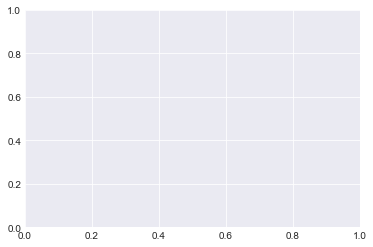

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

np.random.seed(0)

mean = [10, 10]
cov = [[10, 3], [3, 10]]

x1, y1 = np.random.multivariate_normal(mean, cov,100).T
true_false = np.random.rand(100) >0.9

label1 = np.where(true_false, 1, 0)

mean = [20, 20]
cov = [[8, 4], [4, 8]]
x2, y2 = np.random.multivariate_normal(mean, cov, 100).T
true_false = np.random.rand(100) > 0.1
label2 = np.where(true_false, 1, 0)

X = (np.r_[x1, x2])
Y = (np.r_[y1, y2])
label = (np.r_[label1, label2])

plt.scatter(X[label ==1], Y[label == 1], marker='^', s=30, c='blue',edgecolors='', label='1:coutinue')
plt.scatter(X[label ==0], Y[label == 0], marker=',', s=30, c='red',edgecolors='', label='0:withdraw')

plt.xlabel("Annual number of purchases")
plt.ylabel("Average purdhase price")

plt.legend(loc="lower right")
plt.show()

In [10]:
!pip install mlxtend

In [11]:
# 必要なライブラリのインポート
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# 訓練データとテストデータに分割
Data = (np.c_[X, Y])
X_train, X_test, y_train, y_test = train_test_split(Data, label, random_state=0)

# ロジスティック回帰の適用
clf = linear_model.LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# 学習した識別平面とテストデータをプロットする
plot_decision_regions(X_test, y_test, clf=clf, res=0.01, legend=2)

TypeError: plot_decision_regions() got an unexpected keyword argument 'res'

In [12]:
# テストデータで性能評価
print(f'Accuracy: {clf.score(X_test, y_test):.2f}') 

# 未知のデータを分類
label_prenew = clf.predict([[20, 15]])  # 適当なデータ[20,15]を分類
print(f'新たな顧客のラベルは{label_prenew}です。')

Accuracy: 0.88
新たな顧客のラベルは[1]です。
